# Compare fitted atmospheric parameters

- author Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS
- creation date : February 12th 2023
- last update : February 16th 2023

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import numpy as np
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import os,sys,re

from astropy.io import fits
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates
from matplotlib import gridspec
%matplotlib inline
import pickle
import seaborn as sns
import copy
from collections import OrderedDict

In [2]:
import matplotlib.offsetbox
props = dict(boxstyle='round',edgecolor="w",facecolor="w", alpha=0.5)

In [3]:
import time
from datetime import datetime,date
from astropy.time import Time
import dateutil.parser
import pytz

In [4]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

# Config

In [5]:
DATE="2023 01 (17,18,19)"

In [6]:
FLAG_SELECT_POLAR = True

In [7]:
path_out = "dataout/fitparamatm"

In [8]:
filenames = [
"fitparamatm-2023-01-17-OG550_65mm_1~holo4_003-psf2dffm-rebin2.csv",
"fitparamatm-2023-01-18-OG550_65mm_1~holo4_003-psf2dffm-rebin2.csv",
"fitparamatm-2023-01-19-OG550_65mm_1~holo4_003-psf2dffm-rebin2.csv",
"fitparamatm-2023-01-17-empty~holo4_003-psf2dffm-rebin2.csv",
"fitparamatm-2023-01-18-empty~holo4_003-psf2dffm-rebin2.csv",
"fitparamatm-2023-01-19-empty~holo4_003-psf2dffm-rebin2.csv",    
#"fitparamatm-2023-01-18-empty~holo4_003-psf2dffm-rebin1.csv"
]

In [9]:
NDAYS = 3
tags = ["OG550 01/17", "OG550 01/18", "OG550 01/19", "No Filt 01/17", "NoFilt 01/18", "NoFilt 01/19"]

In [10]:
all_df = []
for filename in filenames:
    df = pd.read_csv(os.path.join(path_out,filename))
    if FLAG_SELECT_POLAR:
        df = df[df["object"]=='HD185975']
    all_df.append(df)

In [11]:
NF =len(all_df)

In [12]:
all_df[0].head()

,Unnamed: 0,number,object,dateobs,refhour,airmass,pressure,temperature,humidity,filename,...,rotangle,d2ccd,number2,chi2,pwv,oz,grey,epwv,eoz,egrey
0,0,253,HD185975,2023-01-18T03:08:52.415500962Z,-1.943737,2.111228,0,0,0,2023011700253,...,0.449646,179.995940,253,28.149885,2.943176,410.632422,1.016534,0.029723,4.440381,0.000624
1,1,269,HD38666,2023-01-18T03:21:14.695994415Z,-1.737548,1.011768,0,0,0,2023011700269,...,0.122984,180.053134,269,990.958101,3.656707,550.000000,1.031296,0.012302,1.607860,0.000131
2,2,270,HD38666,2023-01-18T03:21:57.571002150Z,-1.725638,1.012175,0,0,0,2023011700270,...,0.123179,180.791077,270,1733.846911,3.919689,441.996578,1.014648,0.010734,1.383879,0.000112
3,3,279,HD38666,2023-01-18T03:27:10.165993443Z,-1.638806,1.015372,0,0,0,2023011700279,...,0.127071,179.837876,279,1549.801344,3.369070,549.999999,1.032428,0.009486,1.301148,0.000107
4,4,280,HD38666,2023-01-18T03:27:52.980498634Z,-1.626913,1.015841,0,0,0,2023011700280,...,0.118155,180.257792,280,1001.835057,3.596971,516.091849,1.028777,0.012760,1.642551,0.000135


In [13]:
hls_colors = sns.color_palette("hls", NF)

/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_11590/1489658469.py:33: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:o" (-> color='r'). The keyword argument will take precedence.
  ax.plot(all_datetime,airmasses,'r:o',color=hls_colors[idx],lw=3)


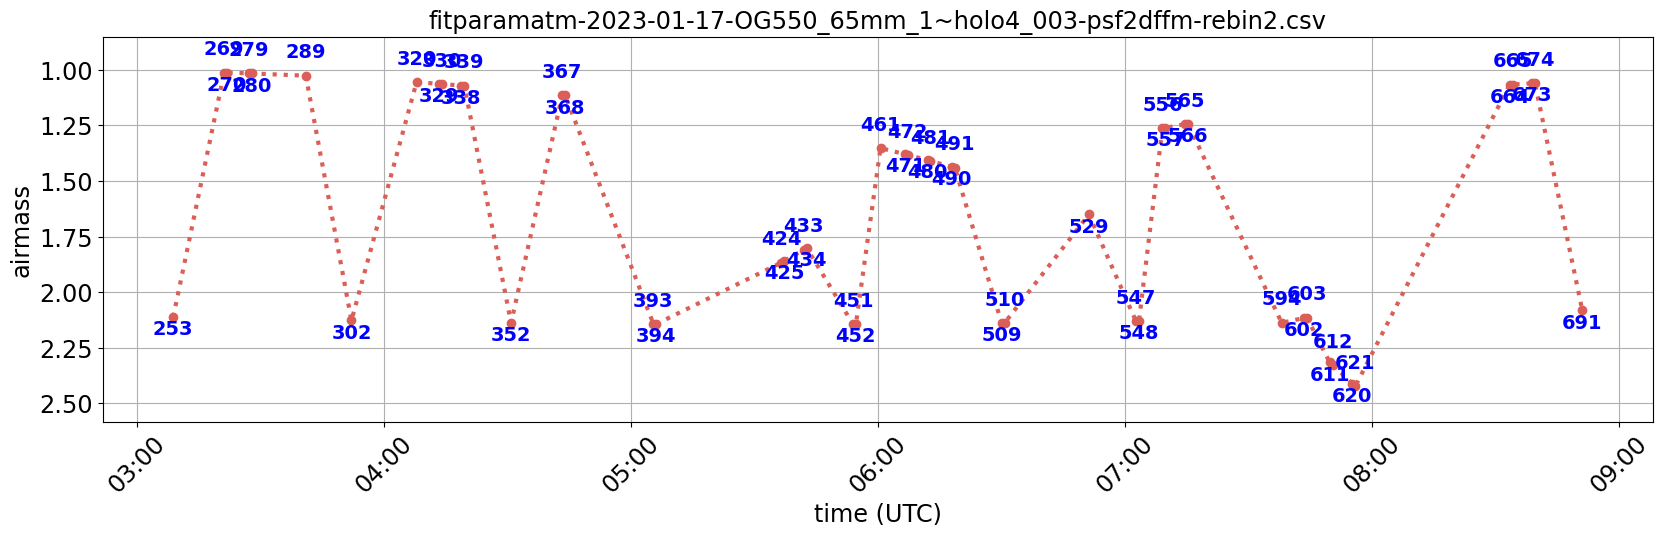

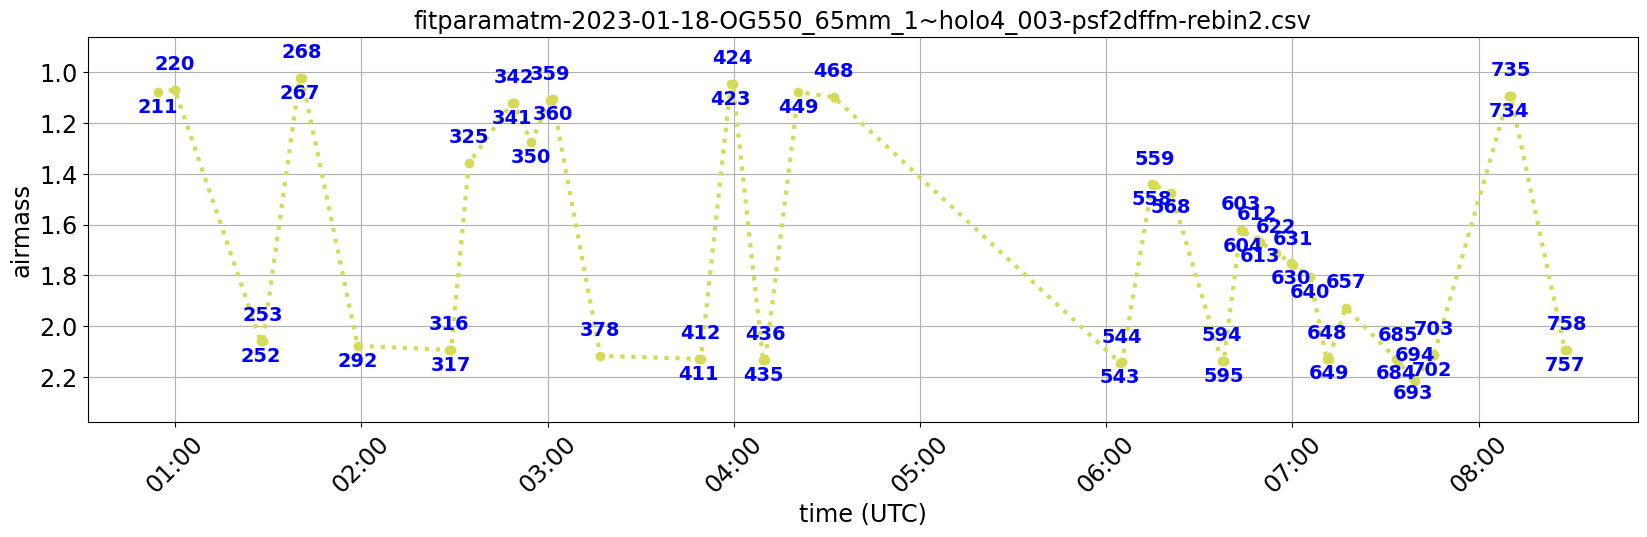

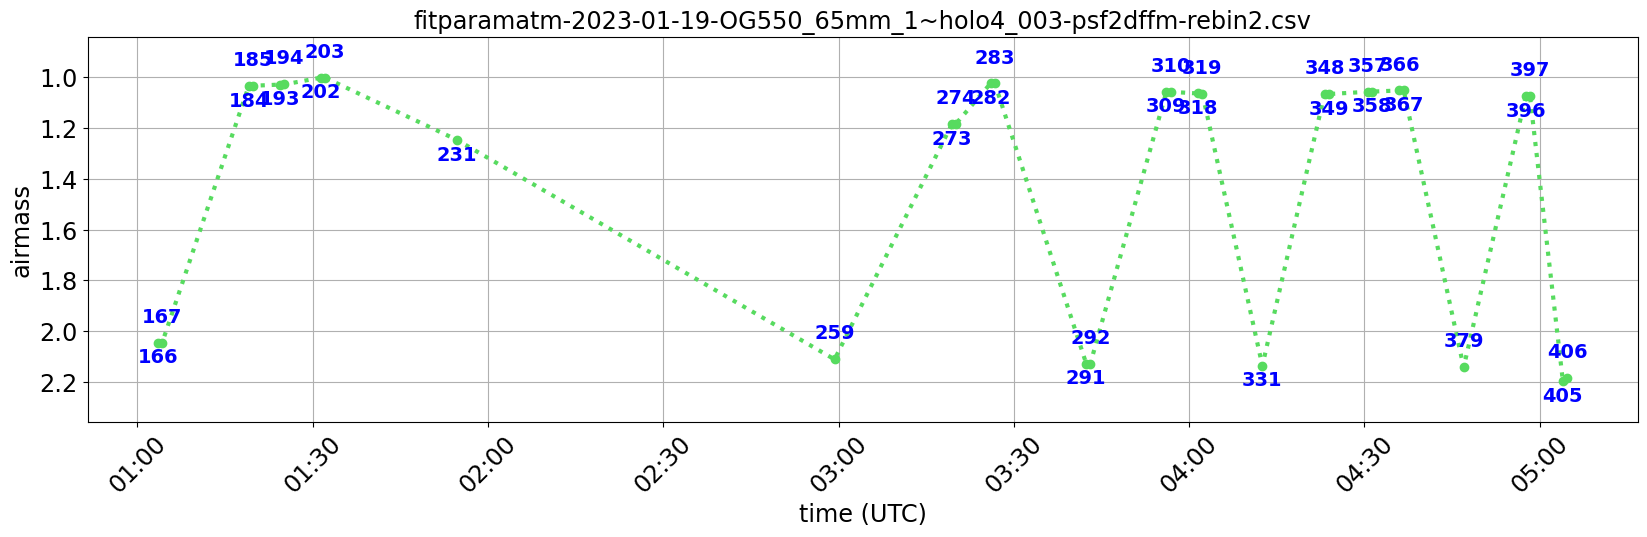

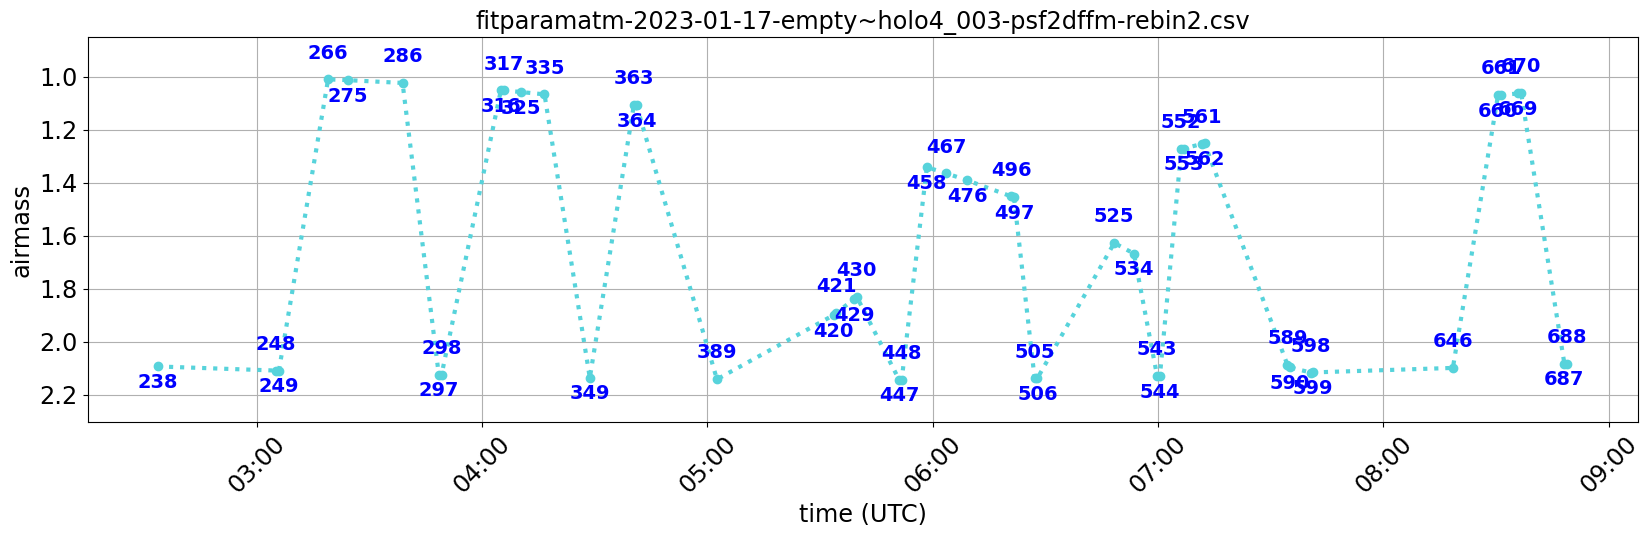

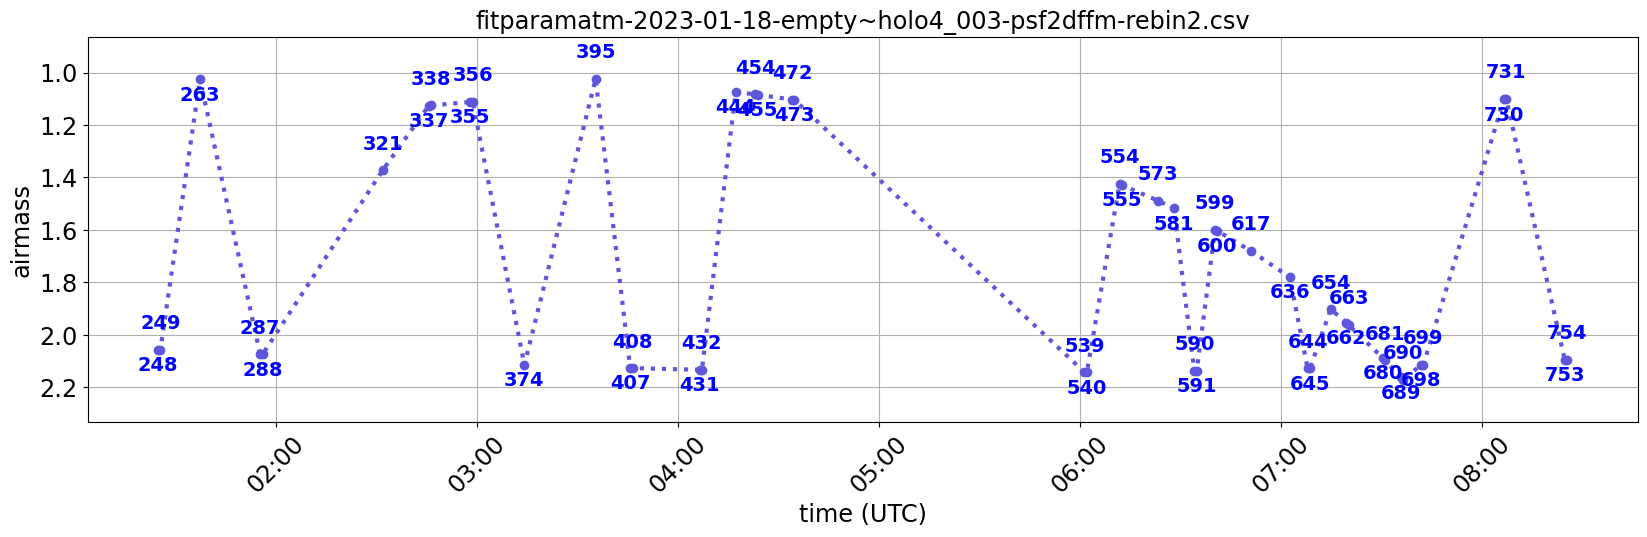

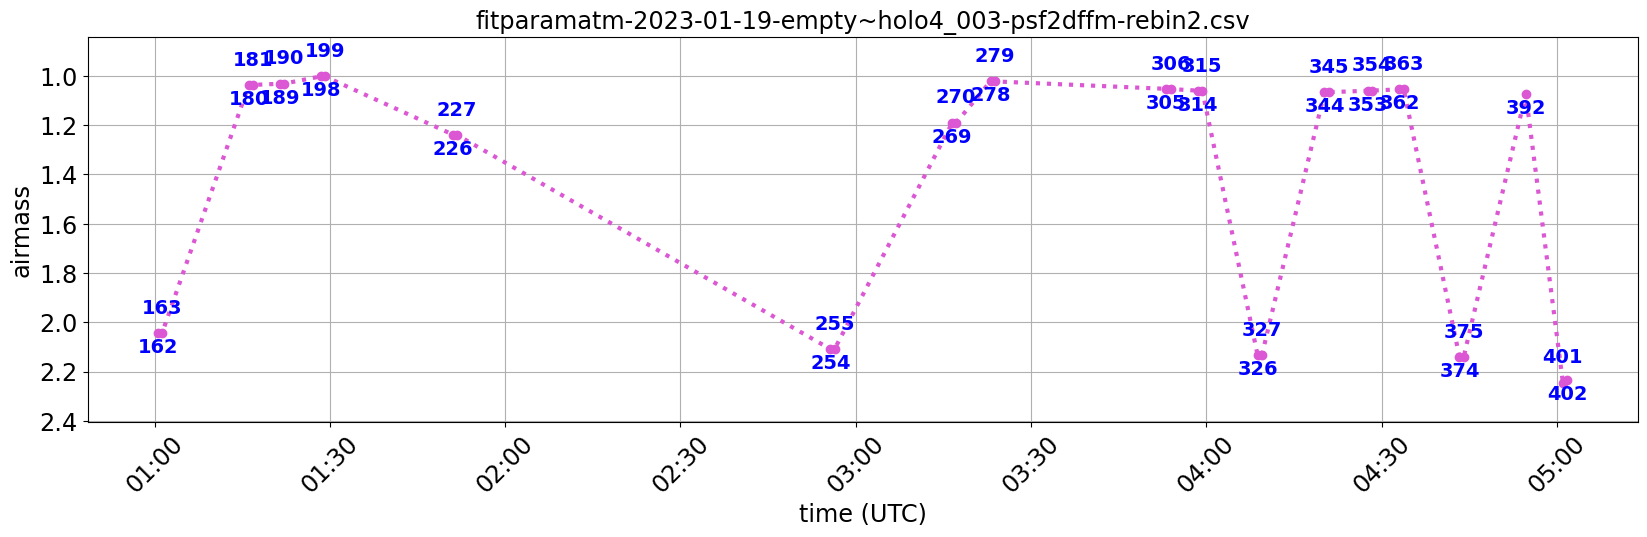

In [14]:
for idx,infos in enumerate(all_df):
    
    all_datetime = [ Time(str_time).to_datetime() for str_time in infos['dateobs'] ]
    numbers = infos['number'].values
    airmasses = infos['airmass'].values
    
    N= len(numbers)
  
    

    # Create rectangle x coordinates
    startTime = all_datetime[0]
    endTime =  all_datetime[-1]

    # convert to matplotlib date representation
    start = mdates.date2num(startTime)
    end = mdates.date2num(endTime)
    width = end - start



    fig=plt.figure(figsize=(20,5))
    
    ax=fig.add_subplot(111)
    myFmt = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(myFmt)

    

    y_shift= 0.08

  
    ax.plot(all_datetime,airmasses,'r:o',color=hls_colors[idx],lw=3)
    ax.xaxis.set_major_formatter(myFmt)
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_xlabel("time (UTC)")
    ax.set_ylabel("airmass")
    ax.set_ylim(airmasses.min()-2*y_shift,airmasses.max()+2*y_shift)
    # Plot rectangle
    #rect = plt.Rectangle((start, airmasses.min()-2*y_shift), width, airmasses.max()+ 2*y_shift, color='grey',alpha=0.3)
    #ax2.add_patch(rect)   
    ax.invert_yaxis()
    ax.grid()


    for index in range(N):
        textstr= str(numbers[index])
        if index%2 == 0:
            dy = y_shift
        else:
            dy = -y_shift
            
        ax.text(all_datetime[index], airmasses[index] + dy , textstr,fontsize=14,fontweight="bold",ha='center',color="b" )
    
    ax.set_title(filenames[idx])
    
    plt.show()
    
    

In [15]:
hls_colors = sns.color_palette("hls", NF)

/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_11590/905315650.py:33: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:o" (-> color='r'). The keyword argument will take precedence.
  ax.plot(all_datetime,pwv,'r:o',color=hls_colors[idx],lw=3)


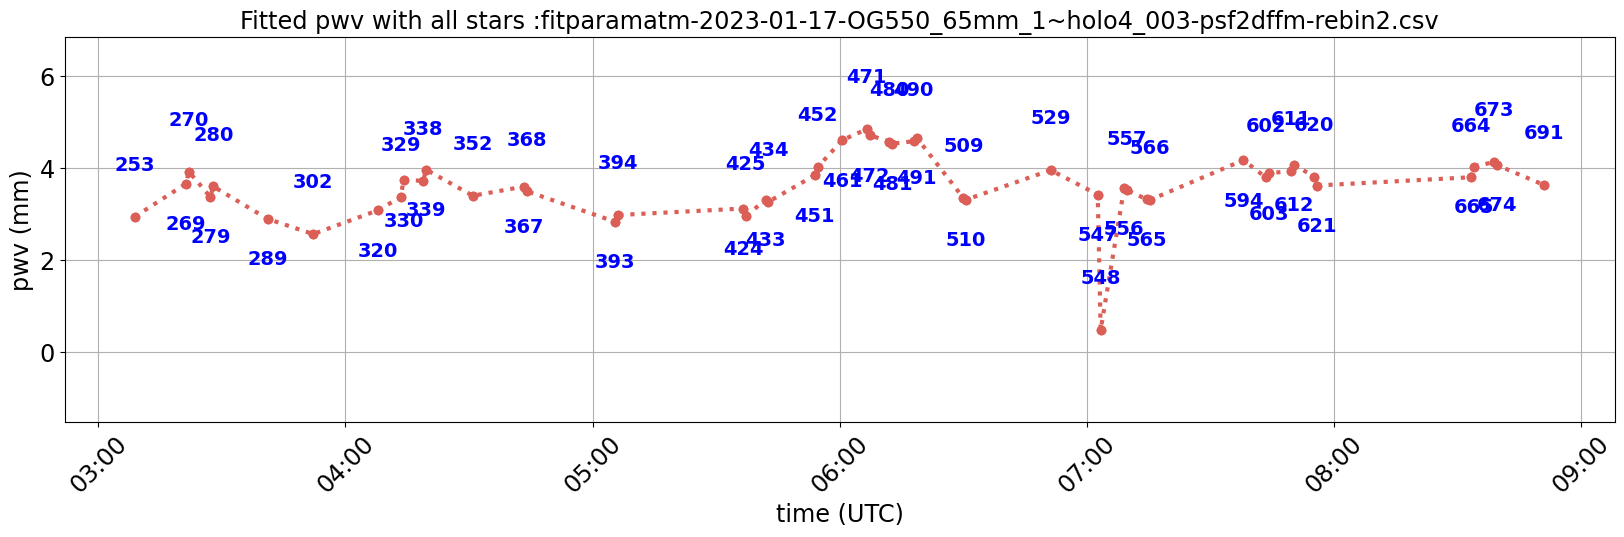

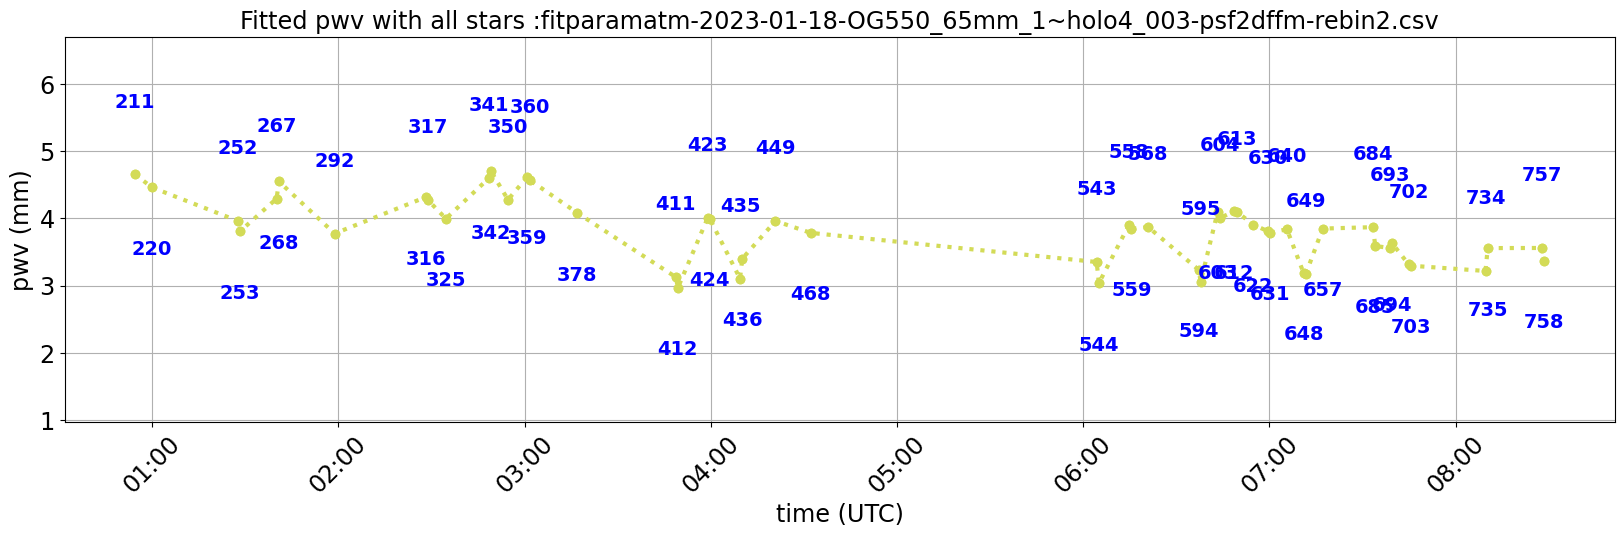

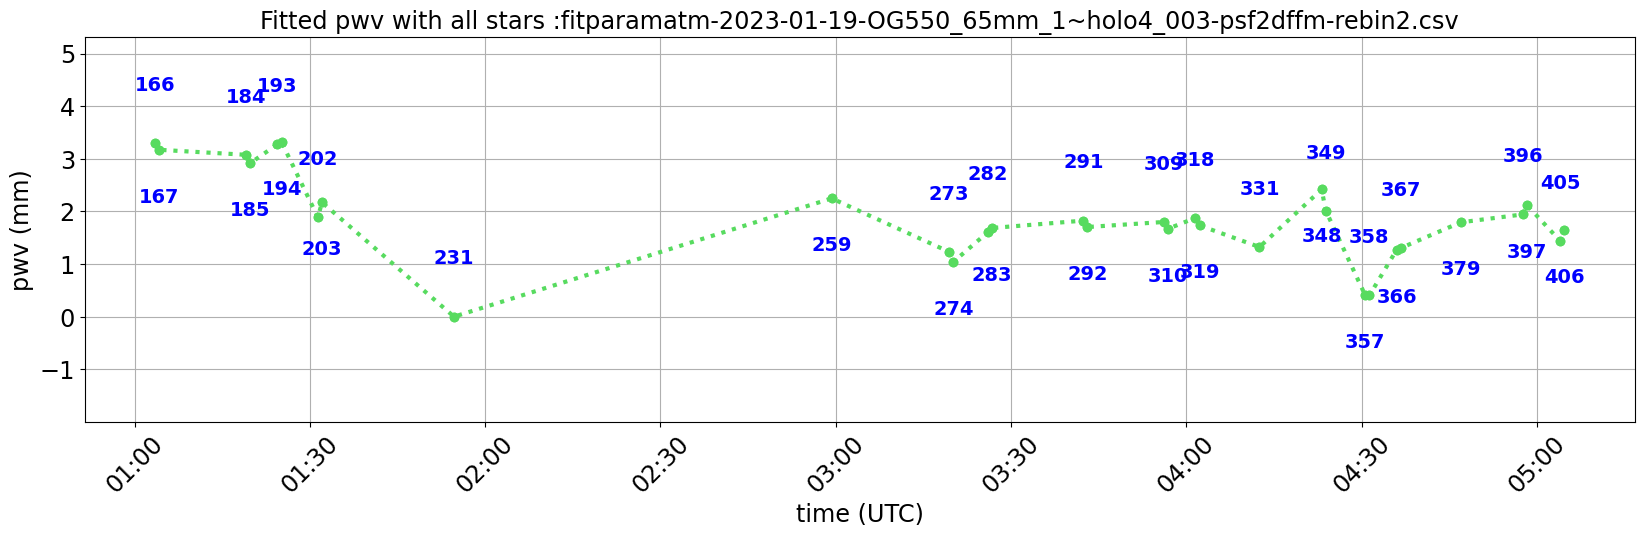

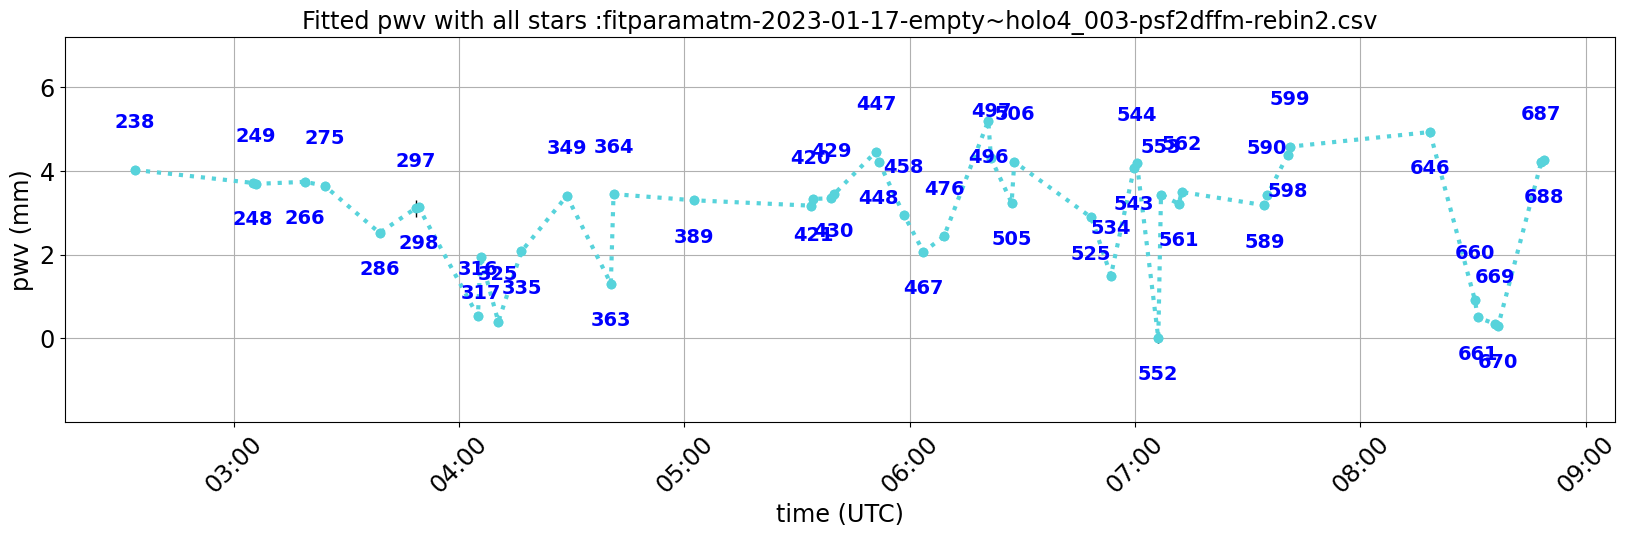

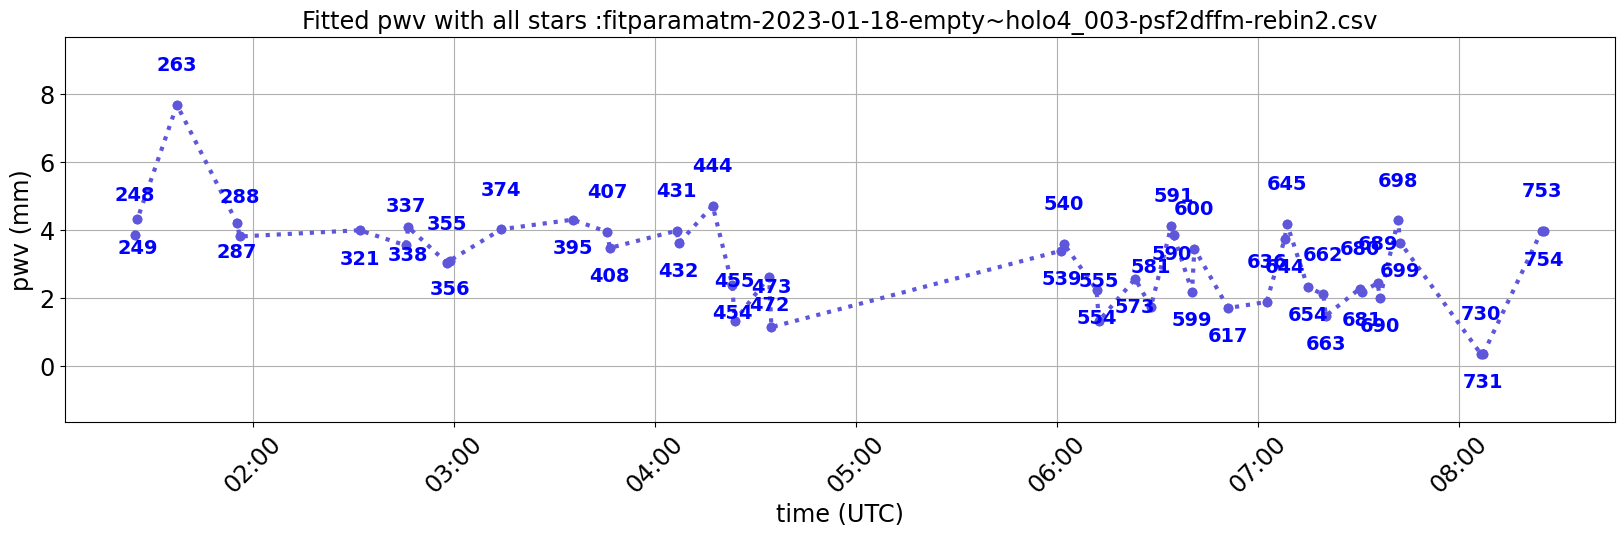

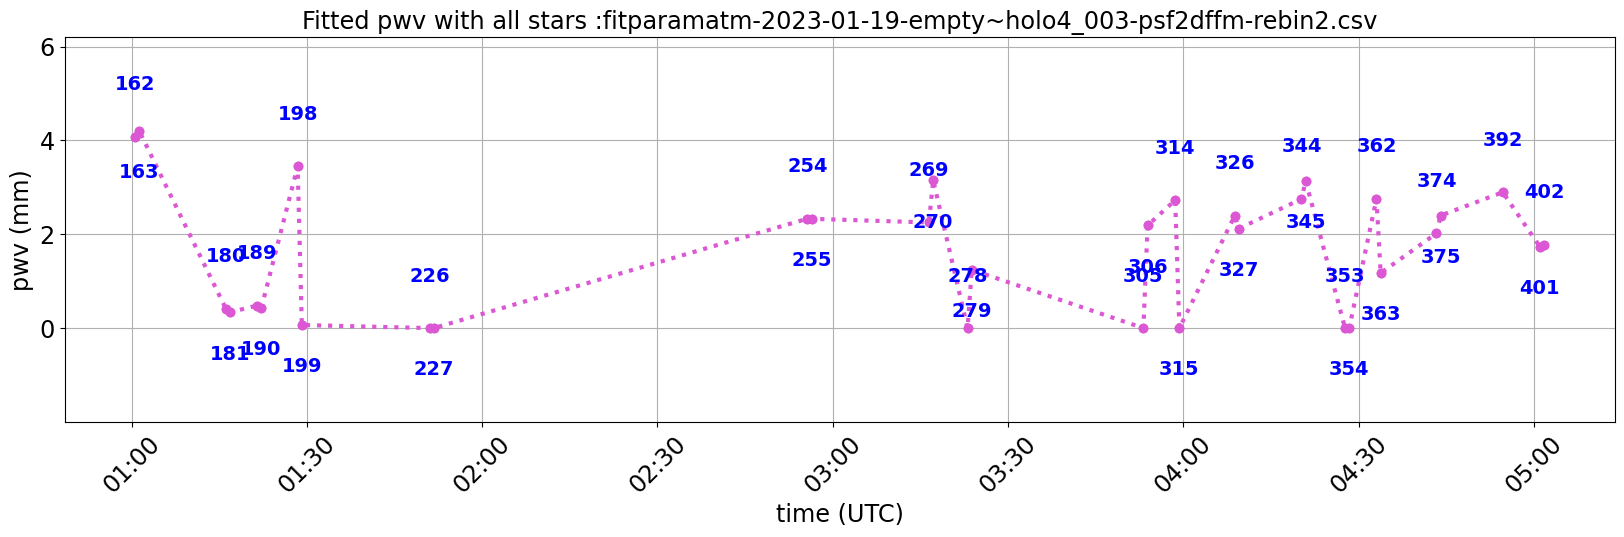

In [16]:
for idx,infos in enumerate(all_df):
    
    all_datetime = [ Time(str_time).to_datetime() for str_time in infos['dateobs'] ]
    numbers = infos['number'].values
    pwv= infos['pwv'].values
    epwv= infos['epwv'].values
    
    N= len(numbers)
  
    

    # Create rectangle x coordinates
    startTime = all_datetime[0]
    endTime =  all_datetime[-1]

    # convert to matplotlib date representation
    start = mdates.date2num(startTime)
    end = mdates.date2num(endTime)
    width = end - start



    fig=plt.figure(figsize=(20,5))
    
    ax=fig.add_subplot(111)
    myFmt = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(myFmt)
 

    y_shift= 1

  
    ax.plot(all_datetime,pwv,'r:o',color=hls_colors[idx],lw=3)
    ax.errorbar(all_datetime,pwv,yerr=epwv,fmt='o',color=hls_colors[idx],ecolor="k",lw=1,alpha=1)
    
    ax.xaxis.set_major_formatter(myFmt)
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_xlabel("time (UTC)")
    ax.set_ylabel("pwv (mm)")
    ax.set_ylim(pwv.min()-2*y_shift,pwv.max()+2*y_shift)
    # Plot rectangle
    #rect = plt.Rectangle((start, airmasses.min()-2*y_shift), width, airmasses.max()+ 2*y_shift, color='grey',alpha=0.3)
    #ax2.add_patch(rect)   
    #ax.invert_yaxis()
    ax.grid()


    for index in range(N):
        textstr= str(numbers[index])
        
        if index%2 == 0:
            dy = y_shift
        else:
            dy = -y_shift
            
        ax.text(all_datetime[index], pwv[index] + dy , textstr,fontsize=14,fontweight="bold",ha='center',color="b" )
    
    if FLAG_SELECT_POLAR:
        the_title = "Fitted pwv with polar star HD185975 :" + filenames[idx]
    else:
        the_title = "Fitted pwv with all stars :" + filenames[idx]
    ax.set_title(the_title)
    
    plt.show()
    
    

/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_11590/1657515941.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:o" (-> color='r'). The keyword argument will take precedence.
  ax.plot(all_datetime,pwv,'r:o',color=hls_colors[idx],lw=3)


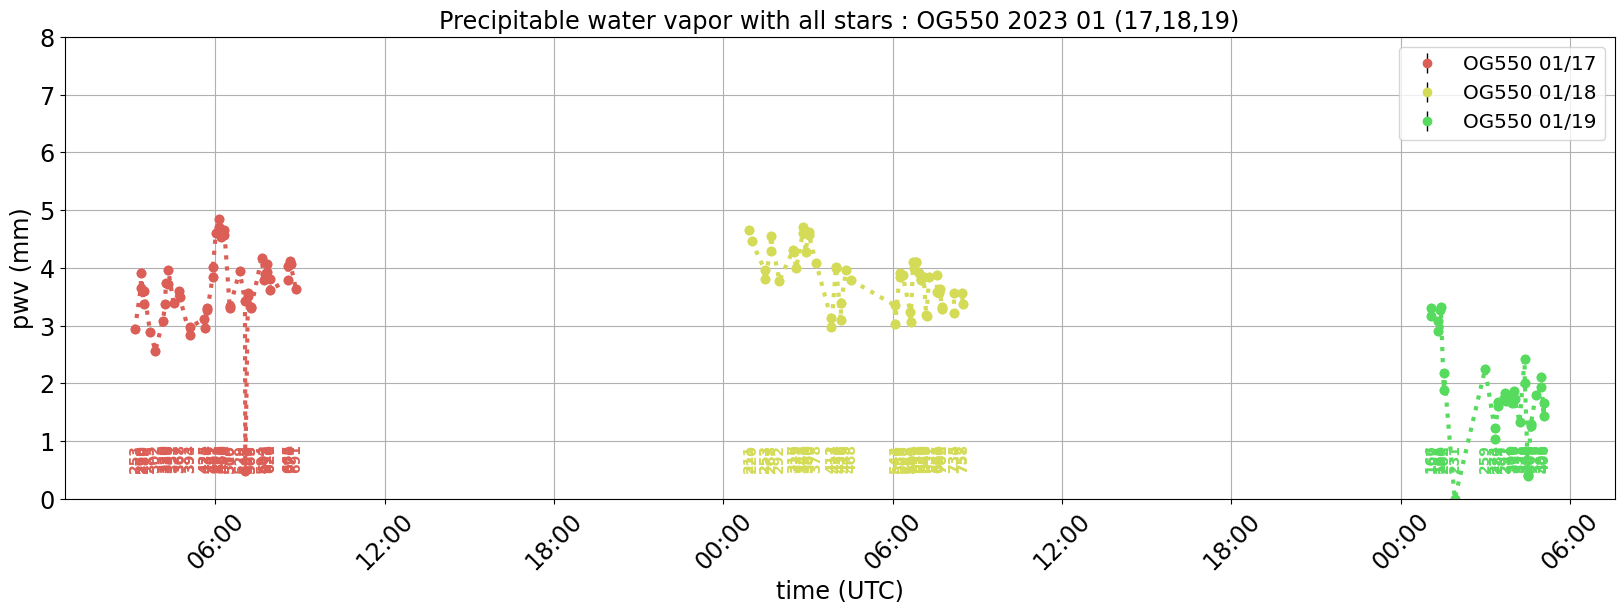

In [17]:
hls_colors = sns.color_palette("hls", NF)
fig=plt.figure(figsize=(20,6))
ax=fig.add_subplot(111)

for idx,infos in enumerate(all_df):
    
    if idx>2:
        continue
    
    all_datetime = [ Time(str_time).to_datetime() for str_time in infos['dateobs'] ]
    numbers = infos['number'].values
    pwv= infos['pwv'].values
    epwv= infos['epwv'].values
    
    N= len(numbers)
  
    

    # Create rectangle x coordinates
    startTime = all_datetime[0]
    endTime =  all_datetime[-1]

    # convert to matplotlib date representation
    start = mdates.date2num(startTime)
    end = mdates.date2num(endTime)
    width = end - start



    
    myFmt = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(myFmt)
 

    y_shift= 1

  
    ax.plot(all_datetime,pwv,'r:o',color=hls_colors[idx],lw=3)
    ax.errorbar(all_datetime,pwv,yerr=epwv,fmt='o',color=hls_colors[idx],ecolor="k",lw=1,alpha=1,label=tags[idx])
    
    ax.xaxis.set_major_formatter(myFmt)
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_xlabel("time (UTC)")
    ax.set_ylabel("pwv (mm)")
    ax.set_ylim(pwv.min()-2*y_shift,pwv.max()+2*y_shift)
    # Plot rectangle
    #rect = plt.Rectangle((start, airmasses.min()-2*y_shift), width, airmasses.max()+ 2*y_shift, color='grey',alpha=0.3)
    #ax2.add_patch(rect)   
    #ax.invert_yaxis()
    ax.grid()



    for index in range(N):
        textstr= str(numbers[index])
            
        ax.text(all_datetime[index], 0.5 , textstr,fontsize=10,fontweight="bold",ha='center',color=hls_colors[idx] ,rotation=90)
        
        #the_target = infos.iloc[index]["object"]
        #ax.text(all_datetime[index], 6.0 , the_target,fontsize=10,ha='left',color=tags_col[idx] ,rotation=60)

plt.grid()
plt.ylim(0,8) 
plt.legend(loc="upper right")

if FLAG_SELECT_POLAR:
    the_title = f"Precipitable water vapor with polar star HD185975 : OG550 {DATE}"
else:
    the_title = f"Precipitable water vapor with all stars : OG550 {DATE}"

plt.title(the_title)
plt.grid()
plt.show()

     

/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_11590/3230620750.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:o" (-> color='r'). The keyword argument will take precedence.
  ax.plot(all_datetime,pwv,'r:o',color=hls_colors[idx],lw=3)


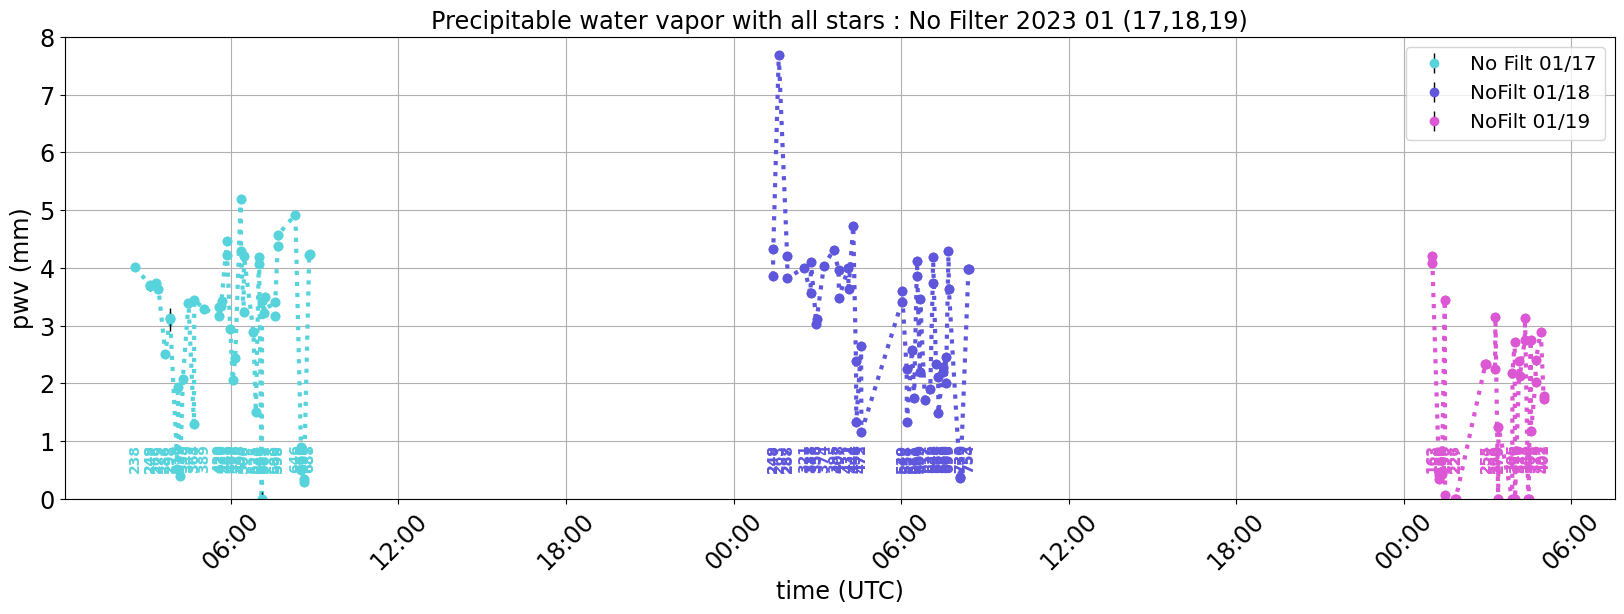

In [18]:
hls_colors = sns.color_palette("hls", NF)
fig=plt.figure(figsize=(20,6))
ax=fig.add_subplot(111)

for idx,infos in enumerate(all_df):
    
    if idx<3:
        continue
    
    all_datetime = [ Time(str_time).to_datetime() for str_time in infos['dateobs'] ]
    numbers = infos['number'].values
    pwv= infos['pwv'].values
    epwv= infos['epwv'].values
    
    N= len(numbers)
  
    

    # Create rectangle x coordinates
    startTime = all_datetime[0]
    endTime =  all_datetime[-1]

    # convert to matplotlib date representation
    start = mdates.date2num(startTime)
    end = mdates.date2num(endTime)
    width = end - start



    
    myFmt = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(myFmt)
 

    y_shift= 1

  
    ax.plot(all_datetime,pwv,'r:o',color=hls_colors[idx],lw=3)
    ax.errorbar(all_datetime,pwv,yerr=epwv,fmt='o',color=hls_colors[idx],ecolor="k",lw=1,alpha=1,label=tags[idx])
    
    ax.xaxis.set_major_formatter(myFmt)
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_xlabel("time (UTC)")
    ax.set_ylabel("pwv (mm)")
    ax.set_ylim(pwv.min()-2*y_shift,pwv.max()+2*y_shift)
    # Plot rectangle
    #rect = plt.Rectangle((start, airmasses.min()-2*y_shift), width, airmasses.max()+ 2*y_shift, color='grey',alpha=0.3)
    #ax2.add_patch(rect)   
    #ax.invert_yaxis()
    ax.grid()



    for index in range(N):
        textstr= str(numbers[index])
            
        ax.text(all_datetime[index], 0.5 , textstr,fontsize=10,fontweight="bold",ha='center',color=hls_colors[idx] ,rotation=90)
        
        #the_target = infos.iloc[index]["object"]
        #ax.text(all_datetime[index], 6.0 , the_target,fontsize=10,ha='left',color=tags_col[idx] ,rotation=60)

plt.grid()
plt.ylim(0,8) 
plt.legend(loc="upper right")

if FLAG_SELECT_POLAR:
    the_title = f"Precipitable water vapor with polar star HD185975 : No Filter {DATE}"
else:
    the_title = f"Precipitable water vapor with all stars : No Filter {DATE}"


plt.title(the_title)
plt.grid()
plt.show()

     

In [19]:
hls_colors = sns.color_palette("hls", NF)

/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_11590/4139682438.py:35: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:o" (-> color='r'). The keyword argument will take precedence.
  ax.plot(all_datetime,oz,'r:o',color=hls_colors[idx],lw=3)


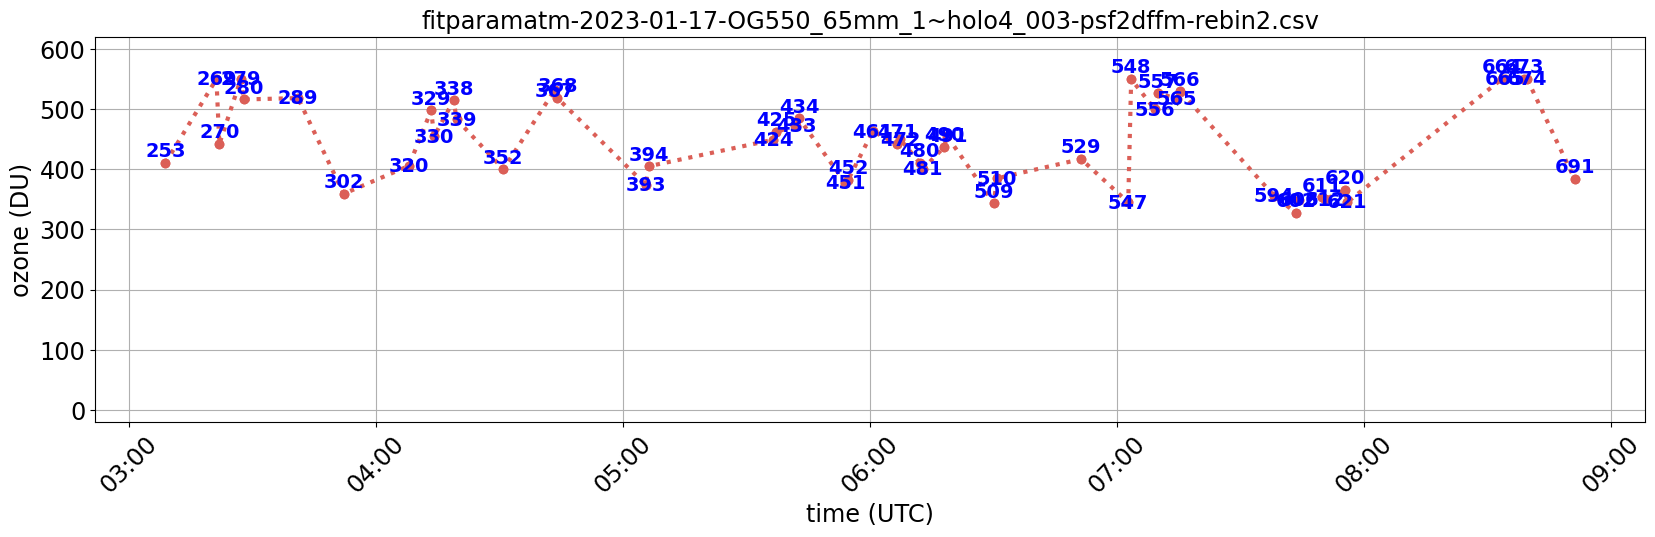

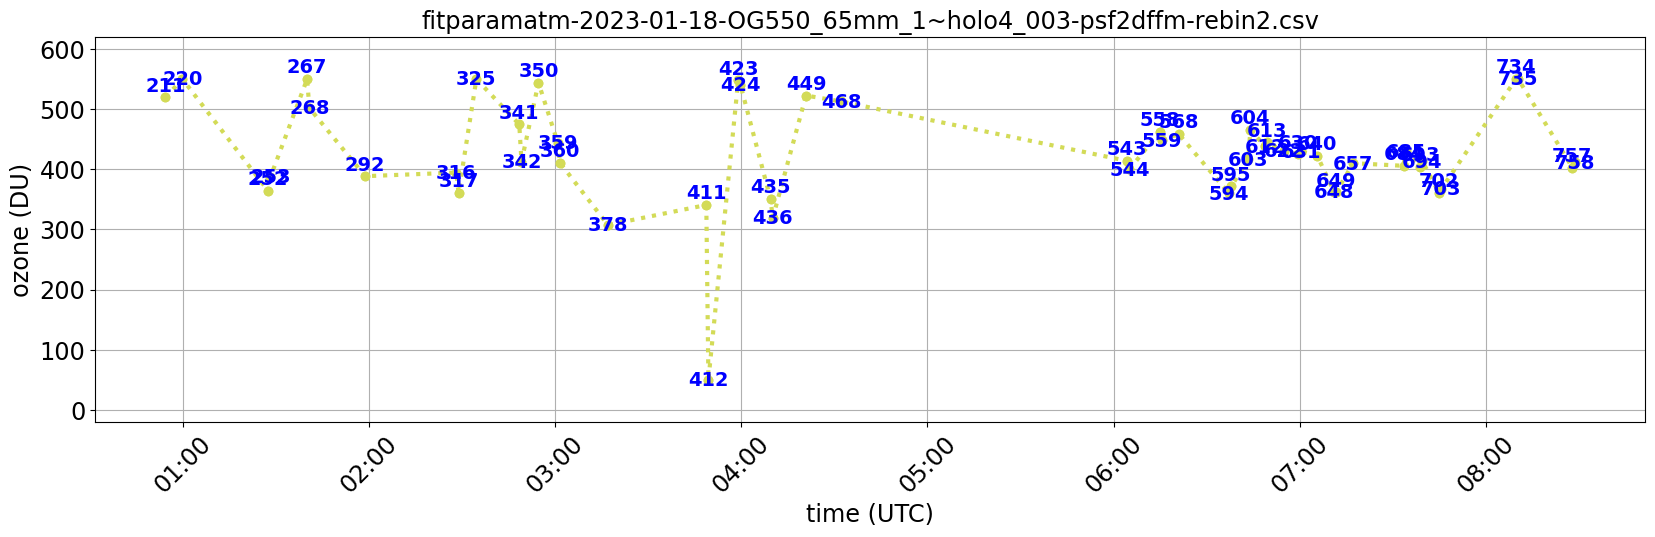

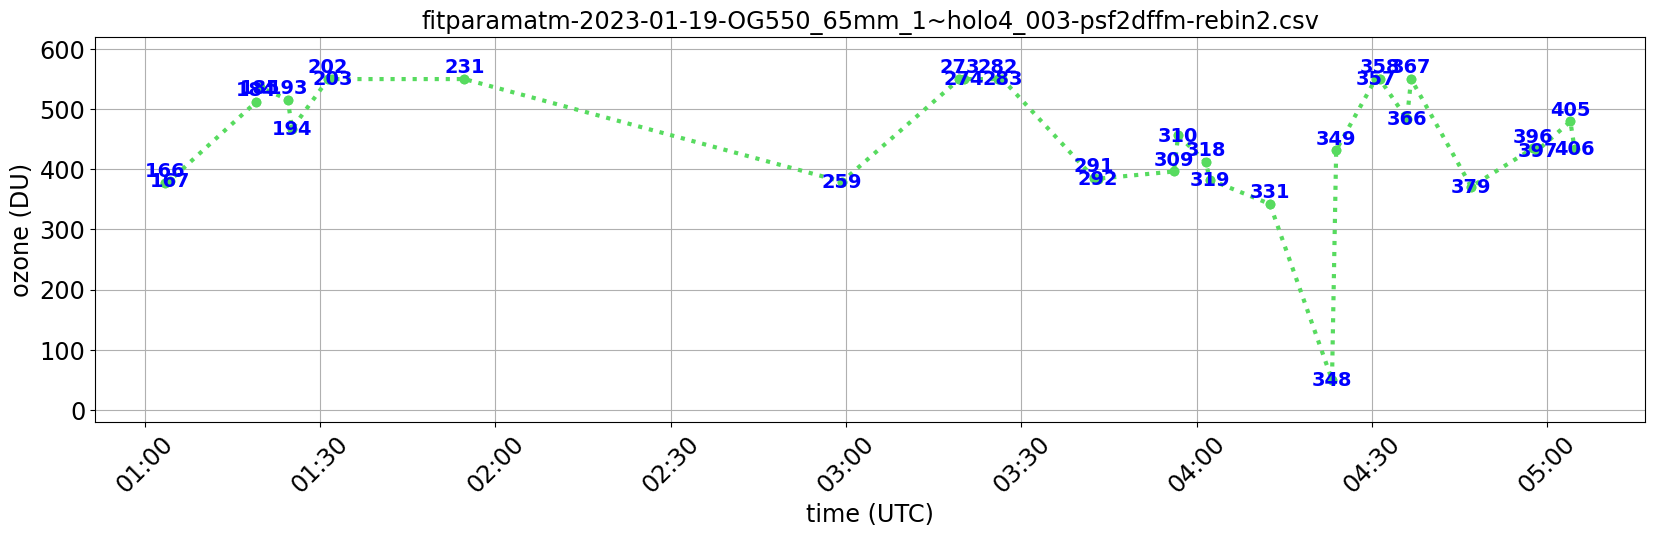

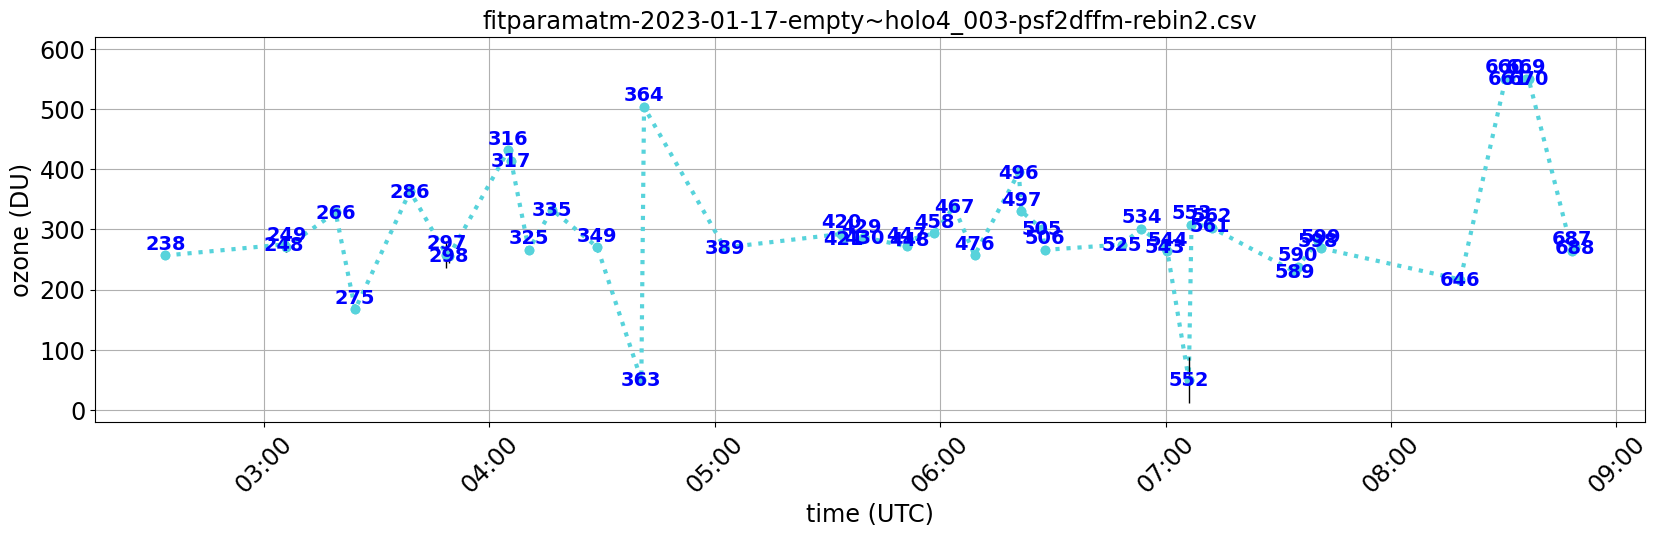

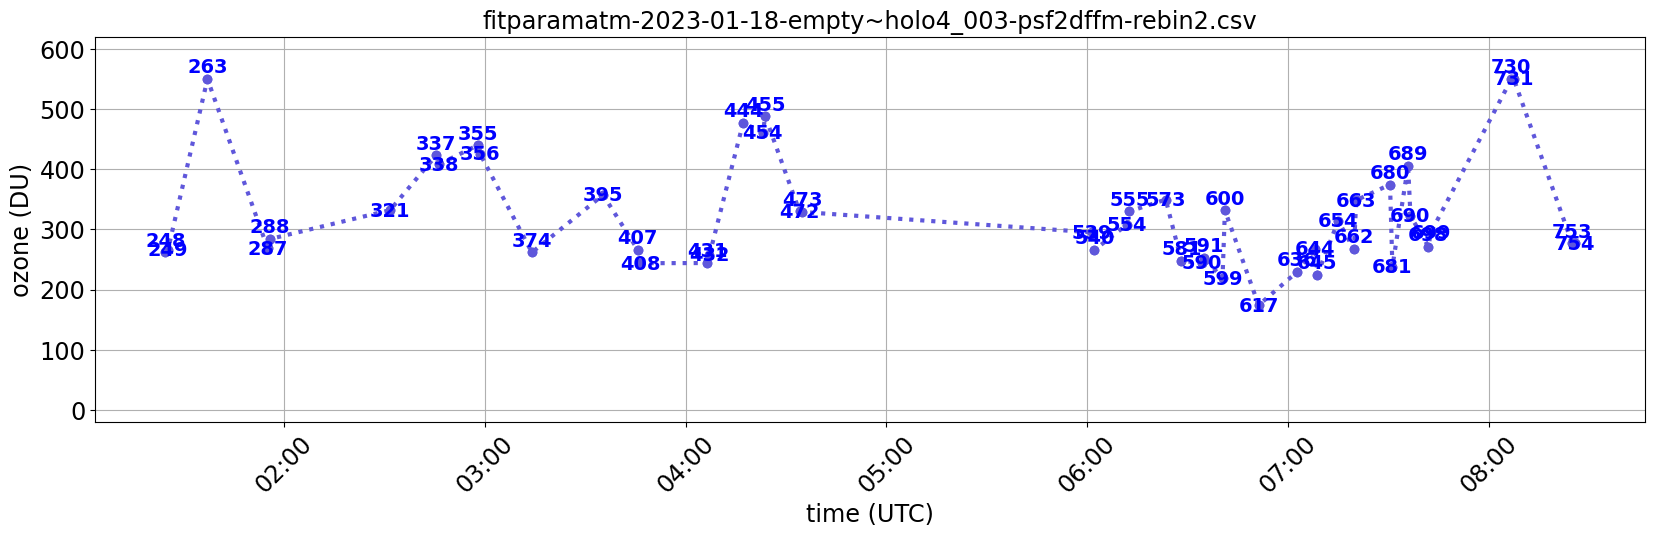

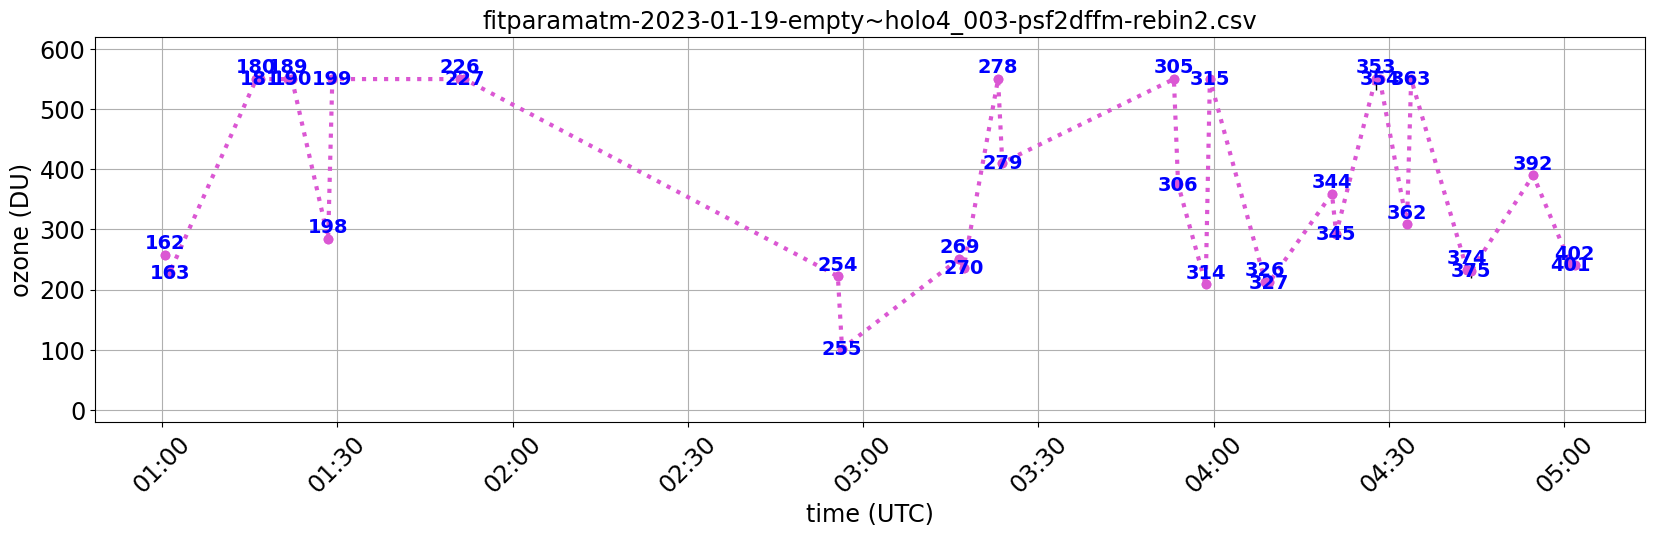

In [20]:
for idx,infos in enumerate(all_df):
    
    all_datetime = [ Time(str_time).to_datetime() for str_time in infos['dateobs'] ]
    numbers = infos['number'].values
    oz= infos['oz'].values
    eoz= infos['eoz'].values
    

    
    N= len(numbers)
  
    

    # Create rectangle x coordinates
    startTime = all_datetime[0]
    endTime =  all_datetime[-1]

    # convert to matplotlib date representation
    start = mdates.date2num(startTime)
    end = mdates.date2num(endTime)
    width = end - start



    fig=plt.figure(figsize=(20,5))
    
    ax=fig.add_subplot(111)
    myFmt = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(myFmt)
 

    y_shift= 10

  
    ax.plot(all_datetime,oz,'r:o',color=hls_colors[idx],lw=3)
    ax.errorbar(all_datetime,oz,yerr=eoz,fmt='o',color=hls_colors[idx],ecolor="k",lw=1,alpha=1)
    
    ax.xaxis.set_major_formatter(myFmt)
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_xlabel("time (UTC)")
    ax.set_ylabel("ozone (DU)")
    ax.set_ylim(0-2*y_shift,600.+2*y_shift)
    # Plot rectangle
    #rect = plt.Rectangle((start, airmasses.min()-2*y_shift), width, airmasses.max()+ 2*y_shift, color='grey',alpha=0.3)
    #ax2.add_patch(rect)   
    #ax.invert_yaxis()
    ax.grid()


    for index in range(N):
        textstr= str(numbers[index])
        if index%2 == 0:
            dy = y_shift
        else:
            dy = -y_shift
            
        ax.text(all_datetime[index], oz[index] + dy , textstr,fontsize=14,fontweight="bold",ha='center',color="b" )
    
    ax.set_title(filenames[idx])
    
    plt.show()
    
    

/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_11590/4071564573.py:40: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:o" (-> color='r'). The keyword argument will take precedence.
  ax.plot(all_datetime,oz,'r:o',color=hls_colors[idx],lw=3)


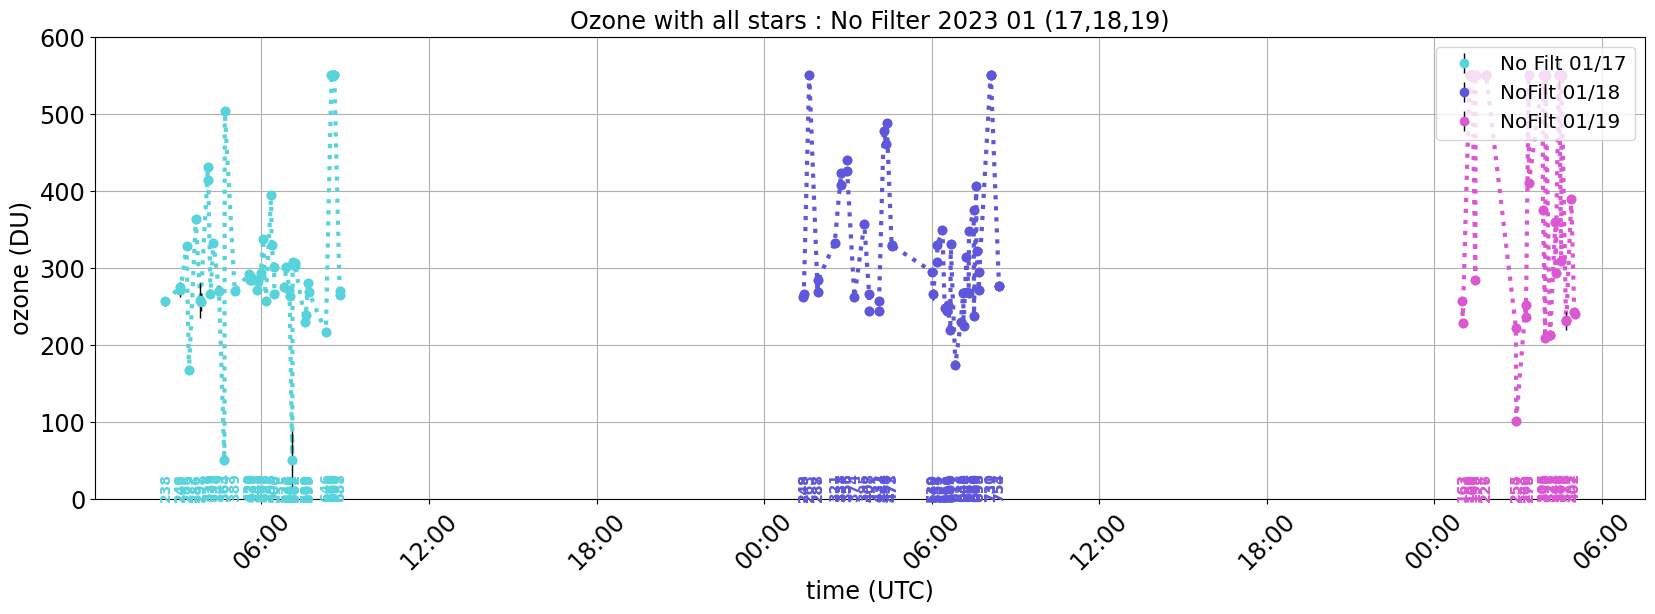

In [21]:
hls_colors = sns.color_palette("hls", NF)
fig=plt.figure(figsize=(20,6))
ax=fig.add_subplot(111)

for idx,infos in enumerate(all_df):
    
    if idx<3:
        continue
    
    all_datetime = [ Time(str_time).to_datetime() for str_time in infos['dateobs'] ]
    numbers = infos['number'].values
    oz= infos['oz'].values
    eoz= infos['eoz'].values
    
   
    
    N= len(numbers)
  
    

    # Create rectangle x coordinates
    startTime = all_datetime[0]
    endTime =  all_datetime[-1]

    # convert to matplotlib date representation
    start = mdates.date2num(startTime)
    end = mdates.date2num(endTime)
    width = end - start



    
    myFmt = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(myFmt)
 

    y_shift= 1

  
    ax.plot(all_datetime,oz,'r:o',color=hls_colors[idx],lw=3)
    ax.errorbar(all_datetime,oz,yerr=eoz,fmt='o',color=hls_colors[idx],ecolor="k",lw=1,alpha=1,label=tags[idx])
    
    ax.xaxis.set_major_formatter(myFmt)
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_xlabel("time (UTC)")
    ax.set_ylabel("ozone (DU)")
    ax.set_ylim(pwv.min()-2*y_shift,pwv.max()+2*y_shift)
    # Plot rectangle
    #rect = plt.Rectangle((start, airmasses.min()-2*y_shift), width, airmasses.max()+ 2*y_shift, color='grey',alpha=0.3)
    #ax2.add_patch(rect)   
    #ax.invert_yaxis()
    ax.grid()



    for index in range(N):
        textstr= str(numbers[index])
            
        ax.text(all_datetime[index], 0.5 , textstr,fontsize=10,fontweight="bold",ha='center',color=hls_colors[idx] ,rotation=90)
        
        #the_target = infos.iloc[index]["object"]
        #ax.text(all_datetime[index], 6.0 , the_target,fontsize=10,ha='left',color=tags_col[idx] ,rotation=60)

plt.grid()
plt.ylim(0,600) 
plt.legend(loc="upper right")

if FLAG_SELECT_POLAR:
    the_title = f"Ozone with polar star HD185975 : No Filter {DATE}"
else:
    the_title = f"Ozone with all stars : No Filter {DATE}"


plt.title(the_title)
plt.grid()
plt.show()

     